<a href="https://colab.research.google.com/github/Aditya-Walia1/Stock-Price-Prediction/blob/main/GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## GRU

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/AMZN.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000


In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' column
close_prices = data['Close'].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
close_prices_scaled = scaler.fit_transform(close_prices.reshape(-1, 1))

# Display the scaled data
close_prices_scaled[:5]


array([[1.50803720e-04],
       [8.93615930e-05],
       [8.37798446e-05],
       [6.42303205e-05],
       [8.37530351e-06]])

In [ ]:
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(close_prices_scaled, seq_length)

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [ ]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Define the model
model = Sequential()
model.add(GRU(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(GRU(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 50)              │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50)                  │          15,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,301 (91.02 KB)

 Trainable params: 23,301 (91.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - loss: 2.5539e-06 - val_loss: 4.6241e-05
Epoch 2/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 70ms/step - loss: 2.7807e-06 - val_loss: 1.8148e-05
Epoch 3/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 21s 72ms/step - loss: 2.2102e-06 - val_loss: 2.0433e-05
Epoch 4/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 2.8355e-06 - val_loss: 3.0714e-05
Epoch 5/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 19s 64ms/step - loss: 2.1787e-06 - val_loss: 4.1653e-05
Epoch 6/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 2.9371e-06 - val_loss: 1.8955e-05
Epoch 7/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 20s 71ms/step - loss: 2.4281e-06 - val_loss: 3.6808e-05
Epoch 8/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - loss: 2.3481e-06 - val_loss: 1.6565e-05
Epoch 9/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - loss: 2.4112e-06 - val_loss: 2.1173e-05
Epoch 10/50
146/146 ━━━━━━━━━━━━━━━━━━━━ 11s 72ms/step - loss: 2.1843e-06 - val_loss: 1.4935e-05
Epoch 11/50
146/146 ━━━━━━━━━━━━━━━━━━━

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.4792e-04
Test Loss: 0.00023005271214060485
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


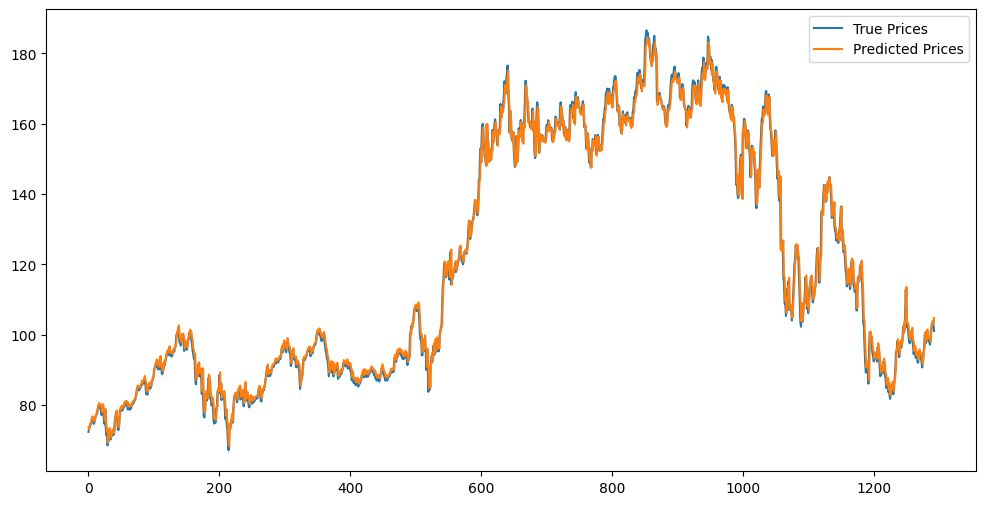

In [ ]:
# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values to get the original scale
predictions_inverse = scaler.inverse_transform(predictions)
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the predictions against the true values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test_inverse, label='True Prices')
plt.plot(predictions_inverse, label='Predicted Prices')
plt.legend()
plt.show()


In [ ]:
!pip install scikit-learn
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test_inverse, predictions_inverse))
print(f'RMSE: {rmse}')

RMSE: 2.828747193608972


In [ ]:
!pip install scikit-learn
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test_inverse, predictions_inverse)
print(f'MAE: {mae}')

# Calculate MAPE
mape = np.mean(np.abs((y_test_inverse - predictions_inverse) / y_test_inverse)) * 100
print(f'MAPE: {mape}')

MAE: 2.014144889361969
MAPE: 1.718901222425975
